# 0.0 Imports

In [11]:
import numpy                    as np
from sklearn    import datasets as ds
from sklearn    import cluster  as ct
from matplotlib import pyplot   as plt
from sklearn    import metrics  as mt

# 1.0 Load Dataset

In [5]:
# Dados sintéticos
random_state = 0
X, y = ds.make_blobs(n_samples=100,
                    n_features=2,
                    centers=3,
                    cluster_std= 0.3,
                    random_state=random_state
                    )

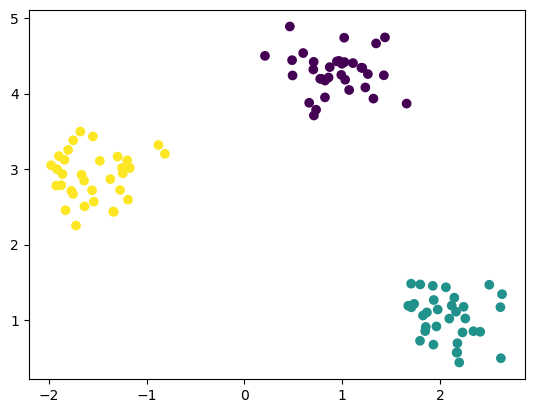

In [10]:
# Plot dos clusters
plt.scatter( X[:,0], X[:,1], c=y )

# 2.0 Training K-Means

In [17]:
# Elbo Method ( Método do Cotovelo )
clusters = np.arange( 2, 11, 1 )
ss_list = []

for c in clusters:
    # define
    kmeans = ct.KMeans( n_clusters=c, init='random', n_init=10, random_state=random_state )
    
    # fit
    labels = kmeans.fit_predict( X )
    
    # performance
    ss_avg = mt.silhouette_score( X, labels )
    
    # add silhouette to list
    ss_list.append( ss_avg )

C:\Users\lui-m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lui-m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lui-m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lui-m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Best K: 3


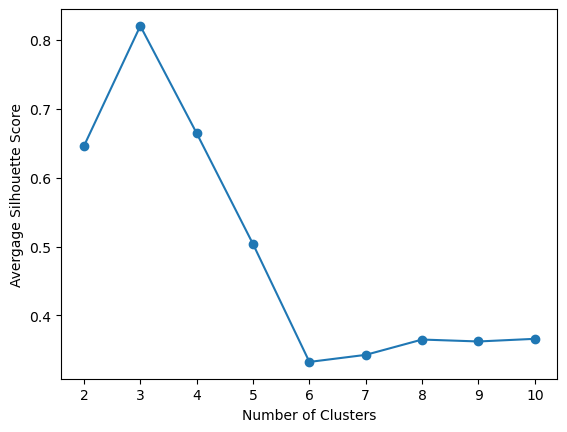

In [19]:
plt.plot( clusters, ss_list, marker='o' )
plt.xlabel( 'Number of Clusters' );
plt.ylabel( 'Avergage Silhouette Score' );
    
# Group
c = ss_list.index( max( ss_list ) ) + 2
print( 'Best K: {}'.format( c ) )

# 3.0 Fine Tunning

C:\Users\lui-m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


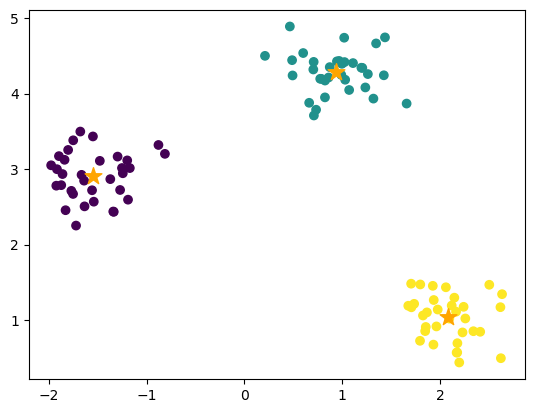

In [21]:
# define
kmeans = ct.KMeans( n_clusters=c, init='random', n_init=10, random_state=random_state )
# fit
labels = kmeans.fit_predict( X )
# performance
ss_avg = mt.silhouette_score( X, labels )
# draw figure
plt.scatter( X[:, 0], X[:, 1], c=labels )

for i in range( len( kmeans.cluster_centers_ ) ):
    plt.scatter( kmeans.cluster_centers_[i, 0],
    kmeans.cluster_centers_[i, 1],
    marker='*',
    c='orange',
    s=160 )
